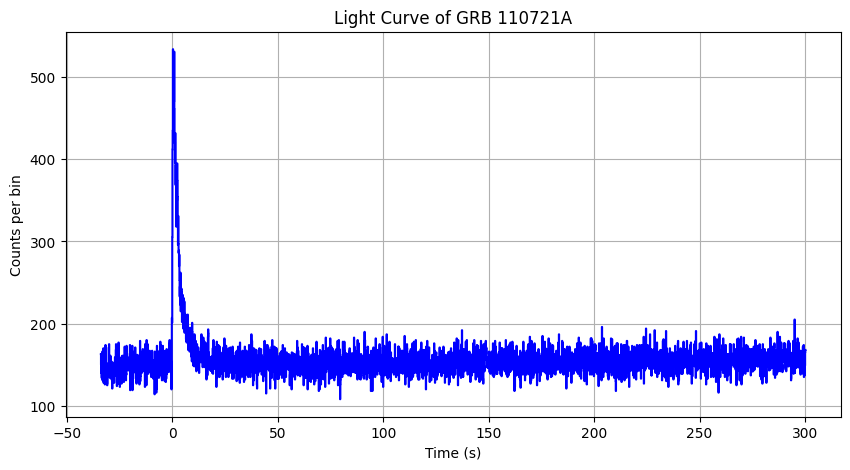

In [36]:
#Checking ehich BGO file to use
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Load the FITS file -- Change which file to use
#file_path = "/home/joydeep/jnotebook/PHY5132_proj/grb110721/current/glg_tte_b0_bn110721200_v00.fit"
file_path = "/home/joydeep/jnotebook/PHY5132_proj/grb110721/current/glg_tte_b1_bn110721200_v00.fit"
with fits.open(file_path) as hdul:
    events_data = hdul["EVENTS"].data  # Extract EVENT data
    t_0 = hdul[0].header['TRIGTIME']

# Extract photon arrival times
time_stamps = events_data["TIME"]
time_stamps -= t_0
# Define time bins for the histogram (light curve)
bin_width = 0.1  # Time bin size in seconds
time_bins = np.arange(time_stamps.min(), time_stamps.max(), bin_width)

# Compute histogram (counts per time bin)
counts, edges = np.histogram(time_stamps, bins=time_bins)

# Plot the light curve
plt.figure(figsize=(10, 5))
plt.plot(edges[:-1], counts, drawstyle='steps-mid', color='blue', lw=1.5)
plt.xlabel("Time (s)")
plt.ylabel("Counts per bin")
plt.title("Light Curve of GRB 110721A")

# Zoom into 500-550 s
#plt.xlim(520+3.32916e8, 540+3.32916e8)

plt.grid(True)
plt.show()


## FITS for data with NAI 6 to 7 + BGO1 from astropy.io import fits

In [5]:
from astropy.io import fits
import numpy as np

# File paths
base_path = "/home/joydeep/jnotebook/PHY5132_proj/grb110721/current/"
filenames = [
    "glg_tte_n6_bn110721200_v00.fit", #now merged n6 to n11 + bgo1
    "glg_tte_n7_bn110721200_v00.fit",
    "glg_tte_n8_bn110721200_v00.fit",
    "glg_tte_n9_bn110721200_v00.fit",
    "glg_tte_na_bn110721200_v00.fit",
    "glg_tte_nb_bn110721200_v00.fit",
    "glg_tte_b1_bn110721200_v00.fit"
]

# Define trigger time
trigger_time = 332916465.760476

# Containers for merged HDUs
ebounds_list = []
events_list = []
gti_list = []

# Loop through files to extract and store data
for fname in filenames:
    with fits.open(base_path + fname) as hdul:
        ebounds_list.append(hdul["EBOUNDS"].data)
        events_list.append(hdul["EVENTS"].data)
        gti_list.append(hdul["GTI"].data)

# Merge each HDU type
merged_ebounds = np.concatenate(ebounds_list)
merged_events = np.concatenate(events_list)
merged_gti = np.concatenate(gti_list)

# Use header from one file as template
with fits.open(base_path + filenames[0]) as template_hdul:
    # Primary header with trigger time
    primary_hdu = fits.PrimaryHDU()
    primary_hdu.header["TRIGTIME"] = trigger_time
    primary_hdu.header["COMMENT"] = "Fully merged file: EVENTS, EBOUNDS, GTI from B1, N6, N7"

    # Use the structure and header from the original HDUs
    ebounds_hdu = fits.BinTableHDU(data=merged_ebounds, header=template_hdul["EBOUNDS"].header, name="EBOUNDS")
    events_hdu = fits.BinTableHDU(data=merged_events, header=template_hdul["EVENTS"].header, name="EVENTS")
    gti_hdu = fits.BinTableHDU(data=merged_gti, header=template_hdul["GTI"].header, name="GTI")

# Final HDU list
merged_hdulist = fits.HDUList([primary_hdu, ebounds_hdu, events_hdu, gti_hdu])

# Output path
output_path = base_path + "merged_TTE_110721200_n6_to_n11_b1.fits"
merged_hdulist.writeto(output_path, overwrite=True)

print(f"Successfully created fully merged FITS file:\n{output_path}")

Successfully created fully merged FITS file:
/home/joydeep/jnotebook/PHY5132_proj/grb110721/current/merged_TTE_110721200_n6_to_n11_b1.fits


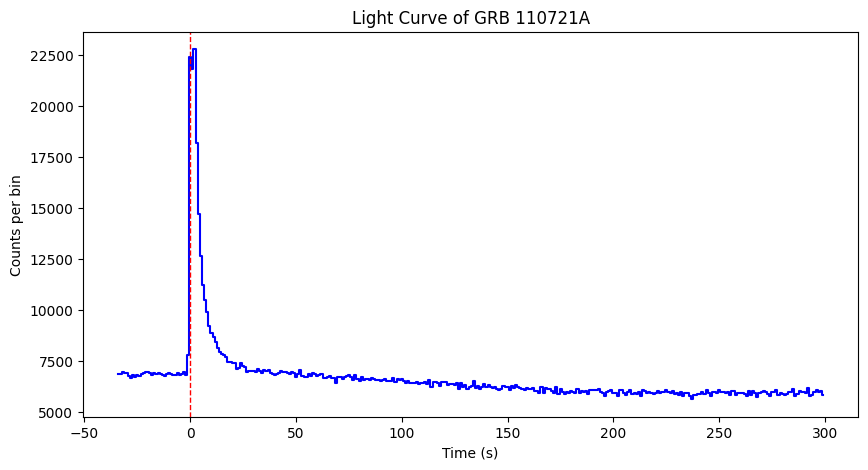

In [35]:
#Test if the merged fits file show lightcurve
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Load the FITS file
file_path = "/home/joydeep/jnotebook/PHY5132_proj/grb110721/current/merged_TTE_110721200_n6_to_n11_b1.fits"

with fits.open(file_path) as hdul:
    events_data = hdul["EVENTS"].data  # Extract EVENT data

# Extract photon arrival times
time_stamps = events_data["TIME"]

# Define time bins for histogram (light curve)
bin_width = 1  # Time bin size in seconds
time_bins = np.arange(time_stamps.min(), time_stamps.max(), bin_width)

# Compute histogram (counts per time bin)
counts, edges = np.histogram(time_stamps, bins=time_bins)

# Plot the light curve
plt.figure(figsize=(10, 5))
plt.plot(edges[:-1], counts, drawstyle='steps-mid', color='blue', lw=1.5)
plt.xlabel("Time (s)")
plt.ylabel("Counts per bin")
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0)
plt.title("Light Curve of GRB 110721A")
plt.savefig('/home/joydeep/jnotebook/PHY5132_proj/Images_GRB110721/light_curve.png')
#plt.grid(True)
plt.show()

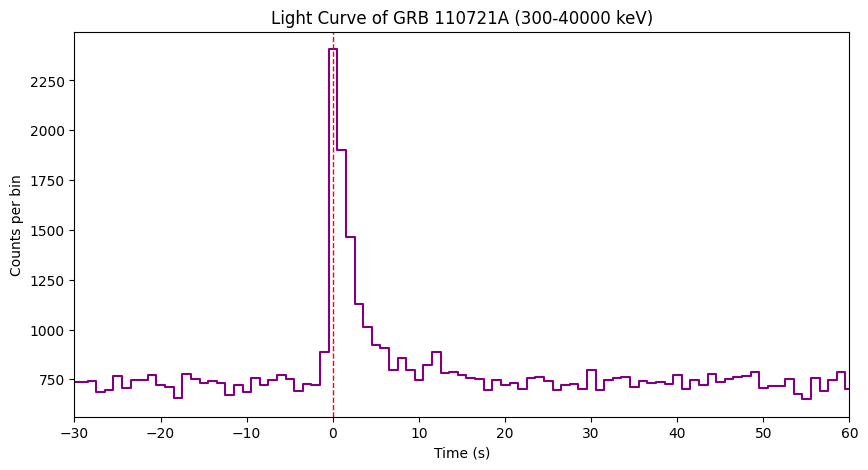

In [24]:
#Trying to plot the lightcurve of merged fits (merged_TTE_110721200_n6_to_n11_b1.fits) for specific energy range
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the FITS file
file_path = "/home/joydeep/jnotebook/PHY5132_proj/grb110721/current/merged_TTE_bn110721200_n6_to_n11.fits"

# Open FITS file
with fits.open(file_path) as hdul:
    events = hdul["EVENTS"].data
    ebounds = hdul["EBOUNDS"].data
    #t_0 = hdul[0].header['TRIGTIME']

# Extract time and channel info
times = events["TIME"]
channels = events["PHA"]  # Or "CHANNEL" depending on instrument

# Map channels to energies
e_min = ebounds["E_MIN"]
e_max = ebounds["E_MAX"]

# Desired energy range in keV
# emin_target = 10 
# emax_target = 50

# emin_target = 50 
# emax_target = 300

emin_target = 300 
emax_target = 40000

# Find which channels correspond to this energy range
channel_mask = (e_max >= emin_target) & (e_min <= emax_target)
valid_channels = np.where(channel_mask)[0]

# Filter events within valid energy range
filtered_times = times[np.isin(channels, valid_channels)]
filtered_times = filtered_times 
# Define binning for the light curve

#bin_width = 0.5  # seconds --initial
bin_width = 1

time_bins = np.arange(filtered_times.min(), filtered_times.max(), bin_width)
counts, bin_edges = np.histogram(filtered_times, bins=time_bins)

# Plot the light curve
plt.figure(figsize=(10, 5))
plt.plot(bin_edges[:-1], counts, drawstyle='steps-mid', lw=1.5, color='purple')
#plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5)  # plot trigger time
plt.xlabel("Time (s)")
plt.ylabel("Counts per bin")
plt.xlim(-30,60) #Added as per range choice for high resolve data
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0)
plt.title(f"Light Curve of GRB 110721A ({emin_target}-{emax_target} keV)")
#plt.grid(True)
#plt.savefig('/home/joydeep/jnotebook/PHY5132_proj/Images_GRB110721/light_curve_range_300_40000.png')
plt.show()

In [25]:
#Trying to demarcate the background and store the value in array
# Shift bin edges relative to trigger time
bin_centers = bin_edges[:-1]  # midpoints for plotting

# Create a combined mask for both intervals
mask_combined = ((bin_centers >= -30) & (bin_centers < -5)) | ((bin_centers >= 30) & (bin_centers < 60))

# Apply the mask
selected_times = bin_centers[mask_combined]
selected_counts = counts[mask_combined]

# Display
print("Counts from -30 to -5 and 30 to 60 seconds (merged):")
for t, c in zip(selected_times, selected_counts):
    print(f"{t:.2f}s : {c} counts")

Counts from -30 to -5 and 30 to 60 seconds (merged):
-29.97s : 736 counts
-28.97s : 737 counts
-27.97s : 739 counts
-26.97s : 685 counts
-25.97s : 698 counts
-24.97s : 769 counts
-23.97s : 704 counts
-22.97s : 745 counts
-21.97s : 748 counts
-20.97s : 770 counts
-19.97s : 720 counts
-18.97s : 713 counts
-17.97s : 656 counts
-16.97s : 779 counts
-15.97s : 751 counts
-14.97s : 733 counts
-13.97s : 740 counts
-12.97s : 729 counts
-11.97s : 669 counts
-10.97s : 722 counts
-9.97s : 688 counts
-8.97s : 755 counts
-7.97s : 722 counts
-6.97s : 748 counts
-5.97s : 774 counts
30.03s : 797 counts
31.03s : 695 counts
32.03s : 744 counts
33.03s : 756 counts
34.03s : 763 counts
35.03s : 709 counts
36.03s : 740 counts
37.03s : 729 counts
38.03s : 734 counts
39.03s : 725 counts
40.03s : 774 counts
41.03s : 702 counts
42.03s : 746 counts
43.03s : 721 counts
44.03s : 779 counts
45.03s : 738 counts
46.03s : 753 counts
47.03s : 761 counts
48.03s : 765 counts
49.03s : 787 counts
50.03s : 708 counts
51.03s 

Fitted constant value: 733.47 counts


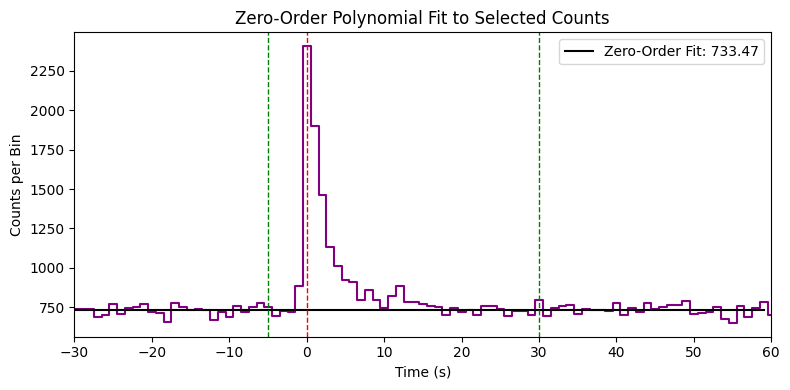

In [28]:
#Zero order polynomial fitting for selected_counts 
import numpy as np
import matplotlib.pyplot as plt

# Assuming selected_times and selected_counts are already defined
# Fit a 0th order polynomial (i.e., constant)
coeffs = np.polyfit(selected_times, selected_counts, deg=0)
fitted_counts = np.polyval(coeffs, selected_times) #array for comparison fitted and og values

# Print the constant value (best-fit)
print(f"Fitted constant value: {coeffs[0]:.2f} counts")

# Plotting
plt.figure(figsize=(8, 4))
#plt.plot(selected_times, selected_counts, 'o-', label='Selected Counts')
plt.plot(bin_edges[:-1], counts, drawstyle='steps-mid', lw=1.5, color='purple')
plt.plot(selected_times, fitted_counts, 'k-', label=f'Zero-Order Fit: {coeffs[0]:.2f}')
plt.xlabel("Time (s)")
plt.ylabel("Counts per Bin")
plt.title("Zero-Order Polynomial Fit to Selected Counts")
plt.legend()
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0)
plt.axvline(x=-5, color='green', linestyle='--', linewidth=1.0)
plt.axvline(x=30, color='green', linestyle='--', linewidth=1.0)
plt.xlim(-30,60)
plt.tight_layout()
#plt.savefig('/home/joydeep/jnotebook/PHY5132_proj/Images_GRB110721/zero_order_fit_range_300_40000.png')
plt.show()

Fitted Line: y = 0.096 * x + 731.921


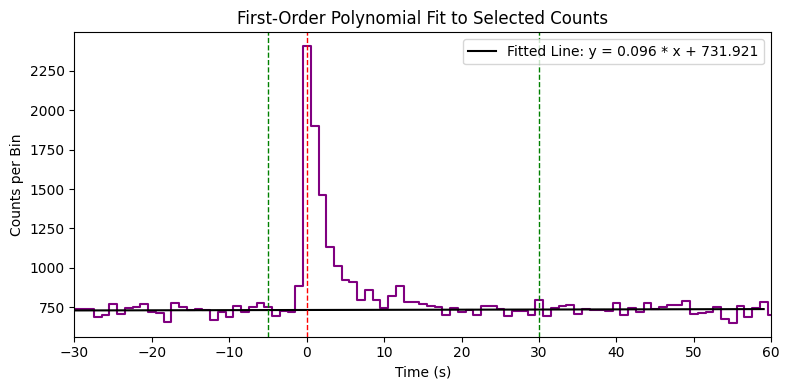

In [29]:
#1st order polynomial fitting for selected_counts 
import numpy as np
import matplotlib.pyplot as plt

# Fit a 1st-order polynomial (straight line)
coeffs_1st = np.polyfit(selected_times, selected_counts, deg=1)
fitted_counts_1st = np.polyval(coeffs_1st, selected_times) #array for comparison fitted and og values

# Print the equation of the line
slope, intercept = coeffs_1st
print(f"Fitted Line: y = {slope:.3f} * x + {intercept:.3f}")

# Plot original vs fitted
plt.figure(figsize=(8, 4))
#plt.plot(selected_times, selected_counts, 'o-', label='Original Counts')
plt.plot(bin_edges[:-1], counts, drawstyle='steps-mid', lw=1.5, color='purple')
plt.plot(selected_times, fitted_counts_1st, 'k-', label=f"Fitted Line: y = {slope:.3f} * x + {intercept:.3f}")
plt.xlabel("Time (s)")
plt.ylabel("Counts per Bin")
plt.title("First-Order Polynomial Fit to Selected Counts")
plt.legend()
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0)
plt.axvline(x=-5, color='green', linestyle='--', linewidth=1.0)
plt.axvline(x=30, color='green', linestyle='--', linewidth=1.0)
plt.xlim(-30,60)
plt.tight_layout()
plt.savefig('/home/joydeep/jnotebook/PHY5132_proj/Images_GRB110721/first_order_fit_range_300_40000.png')
plt.show()

Fitted Parabola: y = -0.008 * x² + 0.329 * x + 738.949


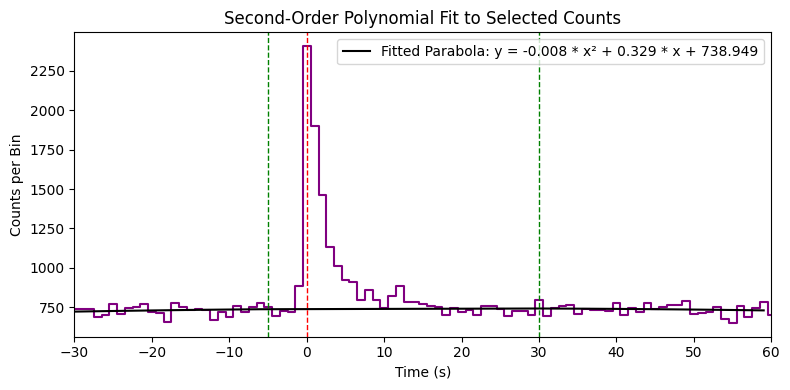

In [30]:
#2nd order polynomial fitting for selected_counts 
import numpy as np
import matplotlib.pyplot as plt

# Fit a 2nd-order polynomial (parabola)
coeffs_2nd = np.polyfit(selected_times, selected_counts, deg=2)
fitted_counts_2nd = np.polyval(coeffs_2nd, selected_times) #array for comparison fitted and og values

# Print the polynomial equation
a, b, c = coeffs_2nd
print(f"Fitted Parabola: y = {a:.3f} * x² + {b:.3f} * x + {c:.3f}")

# Plot original vs fitted
plt.figure(figsize=(8, 4))
#plt.plot(selected_times, selected_counts, 'o-', label='Original Counts')
plt.plot(bin_edges[:-1], counts, drawstyle='steps-mid', lw=1.5, color='purple')
plt.plot(selected_times, fitted_counts_2nd, 'k-', label=f"Fitted Parabola: y = {a:.3f} * x² + {b:.3f} * x + {c:.3f}")
plt.xlabel("Time (s)")
plt.ylabel("Counts per Bin")
plt.title("Second-Order Polynomial Fit to Selected Counts")
plt.legend(loc='upper right')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0)
plt.axvline(x=-5, color='green', linestyle='--', linewidth=1.0)
plt.axvline(x=30, color='green', linestyle='--', linewidth=1.0)
plt.xlim(-30,60)
plt.tight_layout()
plt.savefig('/home/joydeep/jnotebook/PHY5132_proj/Images_GRB110721/second_order_fit_range_300_40000.png')
plt.show()

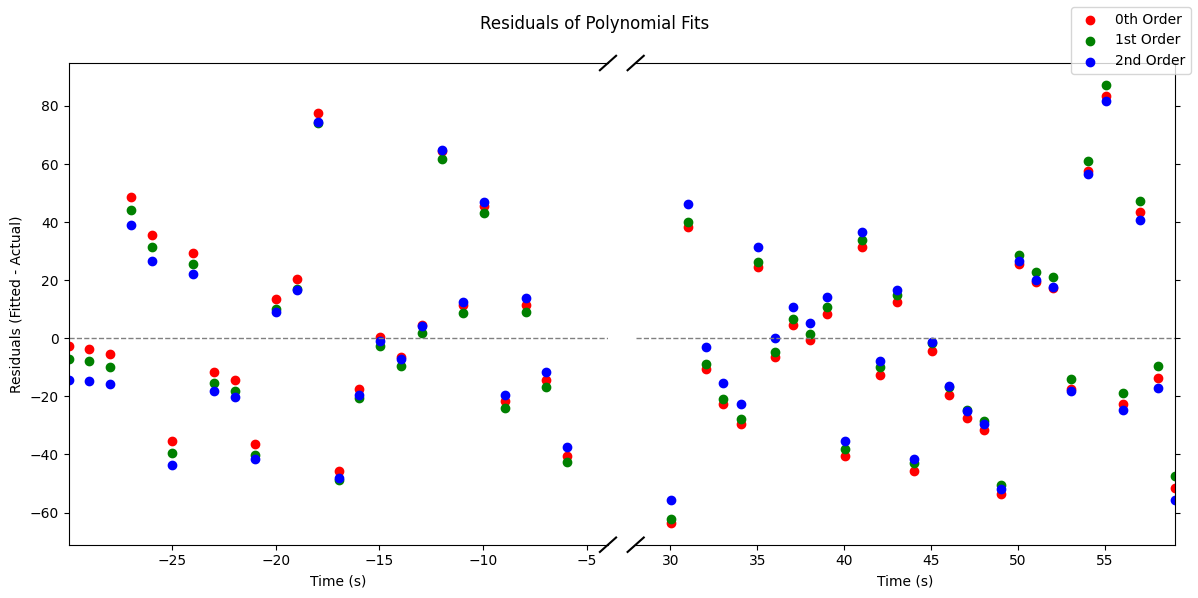

In [31]:
import matplotlib.pyplot as plt

# Compute residuals (error = fitted - actual)
err_0 = fitted_counts - selected_counts
err_1st = fitted_counts_1st - selected_counts
err_2nd = fitted_counts_2nd - selected_counts

# Create broken x-axis plot
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1]})

# Left plot (before -4)
mask_left = selected_times < -4
ax1.scatter(selected_times[mask_left], err_0[mask_left], color='red', label='0th Order')
ax1.scatter(selected_times[mask_left], err_1st[mask_left], color='green', label='1st Order')
ax1.scatter(selected_times[mask_left], err_2nd[mask_left], color='blue', label='2nd Order')
ax1.axhline(0, color='gray', linestyle='--', linewidth=1)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Residuals (Fitted - Actual)")
ax1.set_xlim(selected_times.min(), -4)

# Right plot (after 28)
mask_right = selected_times > 28
ax2.scatter(selected_times[mask_right], err_0[mask_right], color='red')
ax2.scatter(selected_times[mask_right], err_1st[mask_right], color='green')
ax2.scatter(selected_times[mask_right], err_2nd[mask_right], color='blue')
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
ax2.set_xlim(28, selected_times.max())
ax2.set_xlabel("Time (s)")

# Hide the spines between axes
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax1.tick_params(labelright=False)
ax2.yaxis.tick_right()

# Diagonal lines to indicate break
d = .015  # size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot([1-d, 1+d], [-d, +d], **kwargs)        # top-right diagonal
ax1.plot([1-d, 1+d], [1-d, 1+d], **kwargs)      # bottom-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to right axes
ax2.plot([-d, +d], [-d, +d], **kwargs)  # top-left diagonal
ax2.plot([-d, +d], [1-d, 1+d], **kwargs)  # bottom-left diagonal

fig.suptitle("Residuals of Polynomial Fits")
fig.legend(loc='upper right')
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # space for suptitle
plt.savefig('/home/joydeep/jnotebook/PHY5132_proj/Images_GRB110721/residuals_range_300_40000.png')
plt.show()

In [32]:
import numpy as np

# Approximate uncertainties using Poisson errors (sqrt of counts)
sigma = np.sqrt(selected_counts)
# Avoid division by zero
sigma[sigma == 0] = 1e-10

# Degrees of freedom
N = len(selected_counts)
d_0 = 1   # constant model
d_1 = 2   # linear model (ax + b)
d_2 = 3   # quadratic model (ax^2 + bx + c)

# Compute reduced chi-square
chi2_red_0 = np.sum(((selected_counts - fitted_counts) / sigma)**2) / (N - d_0)
chi2_red_1 = np.sum(((selected_counts - fitted_counts_1st) / sigma)**2) / (N - d_1)
chi2_red_2 = np.sum(((selected_counts - fitted_counts_2nd) / sigma)**2) / (N - d_2)

print("Reduced Chi-Square Values:")
print(f"  0th Order Fit:  {np.abs(chi2_red_0 - 1) :.4f}")
print(f"  1st Order Fit:  {np.abs(chi2_red_1 - 1):.4f}")
print(f"  2nd Order Fit:  {np.abs(chi2_red_2 - 1):.4f}")

'''
Range : 10 - 50 keV
Reduced Chi-Square Values:
  0th Order Fit:  0.2821
  1st Order Fit:  0.2577
  2nd Order Fit:  0.0478
  
Range : 50 - 300 keV
Reduced Chi-Square Values:
  0th Order Fit:  0.1399
  1st Order Fit:  0.0133
  2nd Order Fit:  0.0576
  
Range : 300 - 40000 keV
Reduced Chi-Square Values:
  0th Order Fit:  0.5614
  1st Order Fit:  0.5789
  2nd Order Fit:  0.5804
'''

Reduced Chi-Square Values:
  0th Order Fit:  0.5614
  1st Order Fit:  0.5789
  2nd Order Fit:  0.5804


'\nRange : 10 - 50 keV\nReduced Chi-Square Values:\n  0th Order Fit:  0.2821\n  1st Order Fit:  0.2577\n  2nd Order Fit:  0.0478\n  \nRange : 50 - 300 keV\nReduced Chi-Square Values:\n  0th Order Fit:  0.1399\n  1st Order Fit:  0.0133\n  2nd Order Fit:  0.0576\n  \nRange : 300 - 40000 keV\nReduced Chi-Square Values:\n  0th Order Fit:  0.5614\n  1st Order Fit:  0.5789\n  2nd Order Fit:  0.5804\n'